<a href="https://colab.research.google.com/github/HermesMG/HermesMG/blob/main/Google_TF_certification_1_transfer_learning_multiclass_data_augmentation_rps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [12]:
import urllib.request
import os
import zipfile
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile

# Recuperación de archivos de la web

### En el curso desde Colab se usa !wget que no existe en Pycharm
### Sustituyo esto por urllib

In [1]:
import urllib
import zipfile

In [2]:
#%%writefile "bajar zip_datos con urlib.py"
"""Recuperación de archivos de la web
En el curso desde Colab se usa !wget que no existe en Pycharm
Sustituyo esto por urllib"""
import urllib.request
import zipfile
"""!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip"""
data_url=  "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip"
data_file_name= "rps.zip"  
#local_zip = '/tmp/rps.zip'
urllib.request.urlretrieve(data_url, data_file_name)
zip_ref = zipfile.ZipFile(data_file_name, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()
"""!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip"""
data_url=  "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip"
data_file_name= "rps-test-set.zip"  
#local_zip = '/tmp/rps.zip'
urllib.request.urlretrieve(data_url, data_file_name)
zip_ref = zipfile.ZipFile(data_file_name, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
import os
print (os.getcwd())
os.listdir()

/content


['.config', 'rps-test-set.zip', 'rps.zip', 'sample_data']

## Acá sigue el notebook original

In [4]:
import os
import zipfile

#local_zip = '/tmp/rps.zip'
local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

local_zip = 'rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
"""rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')
"""
#Les saco los tmp
rock_dir = os.path.join('rps/rock')
paper_dir = os.path.join('rps/paper')
scissors_dir = os.path.join('rps/scissors')


print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-041.png', 'rock07-k03-079.png', 'rock06ck02-078.png', 'rock01-000.png', 'rock02-078.png', 'rock02-062.png', 'rock06ck02-006.png', 'rock07-k03-030.png', 'rock01-010.png', 'rock02-106.png']
['paper04-015.png', 'paper03-036.png', 'paper03-021.png', 'paper02-099.png', 'paper03-075.png', 'paper07-022.png', 'paper05-119.png', 'paper06-016.png', 'paper05-067.png', 'paper06-095.png']
['scissors02-086.png', 'testscissors01-032.png', 'testscissors01-084.png', 'testscissors01-087.png', 'testscissors03-103.png', 'scissors03-084.png', 'scissors04-076.png', 'scissors02-041.png', 'scissors02-020.png', 'testscissors02-088.png']


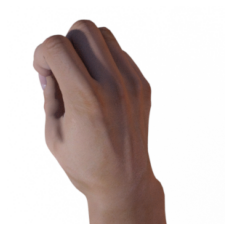

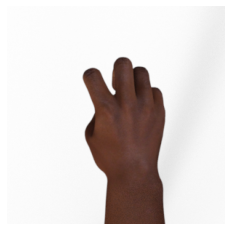

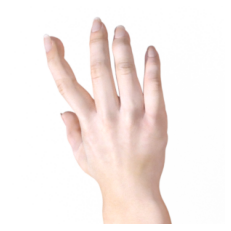

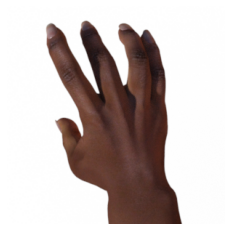

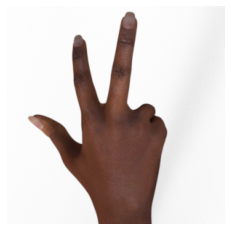

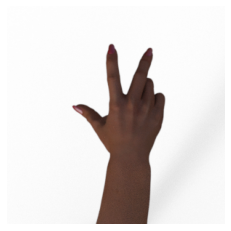

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [10]:
import urllib.request
from tensorflow.keras.applications.inception_v3 import InceptionV3
weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 7, 7, 768)


In [15]:
import time
now = time.time()
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)
"""
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()
"""

# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(3, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

###############################
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
early_stopping = EarlyStopping(patience=5, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_lr=0.001,
patience=5, mode='min',
verbose=1)
model_checkpoint = ModelCheckpoint(monitor='val_loss',
filepath='./best_model.h5',
save_best_only=True)
callbacks = [early_stopping, reduce_lr,  model_checkpoint]
###########################
history = model.fit(train_generator, epochs = 25, 
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks = [callbacks])
######################################
model.save("rps.h5")
print (f"Sin GPU le tomó {round((time.time()-now)/60,2)} minutos ejecutar el script.")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
last layer output shape:  (None, 7, 7, 768)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/25
79/79 [==============================] - 26s 294ms/step - loss: 0.4688 - acc: 0.8635 - val_loss: 0.2411 - val_acc: 0.9220 - lr: 1.0000e-04
Epoch 2/25
79/79 [==============================] - 22s 272ms/step - loss: 0.1210 - acc: 0.9619 - val_loss: 0.8276 - val_acc: 0.7984 - lr: 1.0000e-04
Epoch 3/25
79/79 [==============================] - 22s 282ms/step - loss: 0.0724 - acc: 0.9758 - val_loss: 0.1404 - val_acc: 0.9409 - lr: 1.0000e-04
Epoch 4/25
79/79 [==============================] - 21s 265ms/step - loss: 0.0740 - acc: 0.9810 - val_loss: 0.6899 - val_acc: 0.7500 - lr: 1.0000e-04
Epoch 5/25
79/79 [==============================] - 21s 266ms/step - loss: 0.0608 - acc: 0.9798 - val_loss: 0.1974 - val_acc: 0.9489 - lr: 1.0000e-04
Epoch 6/25
79/79 [==============================] - 22s 281ms/step - loss: 0.0357 - acc: 0.9889 - val_loss: 0.0991 - val_acc: 0.9731 - lr: 1.0000e-04
Epoch 7/25
79/79 [==============================] - 22s 280ms/step - loss: 0.0473 - acc: 0.9849 - va

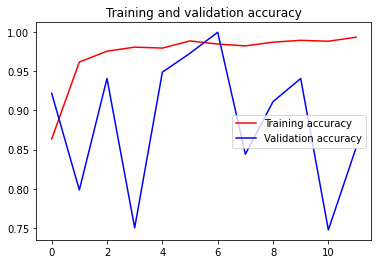

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [18]:
tf.__version__

'2.8.0'

In [ ]:
import numpy as np
#from google.colab import files
#from tf.keras.preprocessing import image
from keras_preprocessing import image

#uploaded = files.upload()

#for fn in uploaded.keys(): 
    # predicting images
#    path = fn
path=r"C:\Users\Paisa\OneDrive\Escritorio\Imágenes\Pandemia.jpg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)

C:\Users\Paisa\OneDrive\Escritorio\Imágenes\Pandemia.jpg
[[0. 1. 0.]]
